In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure

csvpath2015 = "Data_Sets/2015_World_Happiness_Report.csv"
csvpath2016 = "Data_Sets/2016_World_Happiness_Report.csv"


whp_2015_df = pd.read_csv(csvpath2015)
whp_2016_df = pd.read_csv(csvpath2016)


whp_2015_df.head()

#rename Happiness Rank/Score to add year, remove unnecessary columns.  Did not use 2017 data because no column for region.

whp_2015_df=whp_2015_df.rename(columns = {"Happiness Rank":"2015 Happiness Rank", "Happiness Score": "2015 Happiness Score"})
whp_2016_df=whp_2016_df.rename(columns = {"Happiness Rank":"2016 Happiness Rank", "Happiness Score": "2016 Happiness Score"})

whp_2015_df.columns

whp_2015_df = pd.DataFrame(whp_2015_df[['Country', 'Region', '2015 Happiness Rank', '2015 Happiness Score']])
whp_2016_df = pd.DataFrame(whp_2016_df[['Country', 'Region', '2016 Happiness Rank', '2016 Happiness Score']])

whp_regional_df = pd.merge(whp_2015_df, whp_2016_df, on='Country')

whp_regional_df.head()

#rename and remove unnecessary columns

whp_regional_df = whp_regional_df.rename(columns = {'Region_x':'Region'})
whp_regional_df = whp_regional_df[['Country', 'Region', '2015 Happiness Rank', '2015 Happiness Score', '2016 Happiness Rank', "2016 Happiness Score"]]

whp_regional_df.head()

,Country,Region,2015 Happiness Rank,2015 Happiness Score,2016 Happiness Rank,2016 Happiness Score
0,Switzerland,Western Europe,1,7.587,2,7.509
1,Iceland,Western Europe,2,7.561,3,7.501
2,Denmark,Western Europe,3,7.527,1,7.526
3,Norway,Western Europe,4,7.522,4,7.498
4,Canada,North America,5,7.427,6,7.404


In [2]:
#Do groupby to get average for region and country

grpy_region_df = whp_regional_df.groupby(['Region'])
print(grpy_region_df.mean())

avg_region_df = pd.DataFrame(grpy_region_df.mean())
avg_region_df

                                 2015 Happiness Rank  2015 Happiness Score  \
Region                                                                       
Australia and New Zealand                   9.500000              7.285000   
Central and Eastern Europe                 79.000000              5.332931   
Eastern Asia                               64.500000              5.626167   
Latin America and Caribbean                46.909091              6.144682   
Middle East and Northern Africa            80.526316              5.330789   
North America                              10.000000              7.273000   
Southeastern Asia                          81.222222              5.317444   
Southern Asia                             113.142857              4.580857   
Sub-Saharan Africa                        131.147059              4.125647   
Western Europe                             29.523810              6.689619   

                                 2016 Happiness Rank  2016 Happ

,2015 Happiness Rank,2015 Happiness Score,2016 Happiness Rank,2016 Happiness Score
Region,,,,
Australia and New Zealand,9.500000,7.285000,8.500000,7.323500
Central and Eastern Europe,79.000000,5.332931,78.448276,5.370690
Eastern Asia,64.500000,5.626167,67.166667,5.624167
Latin America and Caribbean,46.909091,6.144682,49.681818,6.065773
Middle East and Northern Africa,80.526316,5.330789,78.105263,5.386053
North America,10.000000,7.273000,9.500000,7.254000
Southeastern Asia,81.222222,5.317444,80.000000,5.338889
Southern Asia,113.142857,4.580857,111.714286,4.563286
Sub-Saharan Africa,131.147059,4.125647,132.294118,4.067088


In [3]:
#calculate average for both years for Happiness Score

avg_region_df['Average Happiness Score'] = avg_region_df[['2015 Happiness Score', '2016 Happiness Score']].mean(axis=1)
avg_region_df['Average Happiness Rank'] = avg_region_df[['2015 Happiness Rank', '2016 Happiness Rank']].mean(axis=1)
avg_region_df

,2015 Happiness Rank,2015 Happiness Score,2016 Happiness Rank,2016 Happiness Score,Average Happiness Score,Average Happiness Rank
Region,,,,,,
Australia and New Zealand,9.500000,7.285000,8.500000,7.323500,7.304250,9.000000
Central and Eastern Europe,79.000000,5.332931,78.448276,5.370690,5.351810,78.724138
Eastern Asia,64.500000,5.626167,67.166667,5.624167,5.625167,65.833333
Latin America and Caribbean,46.909091,6.144682,49.681818,6.065773,6.105227,48.295455
Middle East and Northern Africa,80.526316,5.330789,78.105263,5.386053,5.358421,79.315789
North America,10.000000,7.273000,9.500000,7.254000,7.263500,9.750000
Southeastern Asia,81.222222,5.317444,80.000000,5.338889,5.328167,80.611111
Southern Asia,113.142857,4.580857,111.714286,4.563286,4.572071,112.428571
Sub-Saharan Africa,131.147059,4.125647,132.294118,4.067088,4.096368,131.720588


In [4]:
#remove index column so it can be used as an axis for the graph.
avg_region_df.reset_index(level=0, inplace=True)

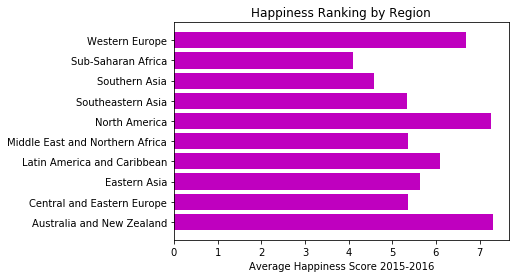

In [5]:
#graph by region
plt.barh(avg_region_df['Region'], avg_region_df['Average Happiness Score'], color='m')


# Give the chart a title, x label, and y label
plt.title("Happiness Ranking by Region")
plt.xlabel("Average Happiness Score 2015-2016")

plt.savefig("Happiness_by_Region.png")